In [1]:
%%capture
!pip install json5
!pip install transformers
!wget https://raw.githubusercontent.com/UTMIST/humerusdecks/master/server/decks/cah-base-en.deck.json5
import json5
d = json5.load((open('cah-base-en.deck.json5')))

In [2]:
# process black cards
# simply mush them together and replace all dicts with a single underscore
bc = d['calls']
flatten = lambda t:[item for sublist in t for item in sublist]
bc = ["".join([x if type(x) == str else '_' for x in flatten(d['calls'][i])]) for i in range(len(d['calls']))]
bc = [i.replace("__", "_") for i in bc]
# grab white cards
wc = d['responses']

In [3]:
bc[:10]

['Hey Reddit! I’m _.Ask me anything.',
 'Introducing X-treme Baseball!It’s like baseball, but with _!',
 'What is Batman’s guilty pleasure?_.',
 'TSA guidelines now prohibit _ on airplanes.',
 'Next from J.K. Rowling: _.',
 'That’s right, I killed _.How, you ask?_.',
 'I’m sorry professor, but I couldn’t complete my homework because of _.',
 'And the Academy Award for _ goes to _.',
 'Dude, do not go in that bathroom.There’s _ in there.',
 'How did I lose my virginity?_.']

In [4]:
# create all possible card combinations
# just brute force it!

import itertools
def make_card_combs(wcs, bcs):
    onec = wcs
    twoc = [i for i in itertools.permutations(wcs, 2)]
    threec = [i for i in itertools.permutations(wcs, 3)]
    bcs = [i.split("_") for i in bcs]
    plays = []
    for bc in bcs:
        bc = [i.strip() for i in bc]
        if len(bc) == 2:
            for p in onec:
               s = bc[0] + " " + p + " " +  bc[1]
               s.replace(". ", " .")
               plays.append(s)
        elif len(bc) == 3:
            for p in twoc:
                s = bc[0] + " " + p[0] + " " +  bc[1] + " " + p[1] + bc[2]
                s.replace(". ", " .")
                plays.append(s)
        elif len(bc) == 4:
            for p in threec:
               s = bc[0] + " " + p[0] + " " +  bc[1] + " " + p[1] + bc[2] + " " + p[2] + " " + bc[3]
               s.replace(". ", " .")
               plays.append(s)

    return [i for i in plays if i != None]

In [5]:
nbc = [i for i in bc if i.count('_')<=2]

In [6]:
all_card_combs = make_card_combs(wc, nbc)

In [7]:
print(len(all_card_combs))

3027000


In [10]:
# in-browser terminal emulator

!pip install kora
from kora import console
console.start()

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
Console URL: https://teleconsole.com/s/5287a98ab97a2797dbf5bcac315a9b7881106ed7


In [ ]:
# generate embeddings w/ huggingface

import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# simply just take this and put it in a loop for all of our cards...
input_ids = tf.constant(tokenizer.encode("Hello, my dog is cute"))[None, :]  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple



Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
print(last_hidden_states)

tf.Tensor(
[[[-0.11437131  0.19371375  0.12495914 ... -0.38269112  0.21065915
    0.54070824]
  [ 0.5308238   0.32074854  0.36645913 ... -0.00360684  0.7578598
    0.03884314]
  [-0.48765147  0.8849246   0.4255638  ... -0.6976215   0.4458339
    0.12309412]
  ...
  [-0.70027936 -0.18150637  0.3296967  ... -0.4837932   0.0680236
    0.8900845 ]
  [-1.0354629  -0.2566781  -0.03165277 ...  0.3197438   0.39990276
    0.17954771]
  [ 0.607992    0.26097    -0.3130718  ...  0.03109769 -0.6282721
   -0.19942439]]], shape=(1, 8, 768), dtype=float32)


In [ ]:
%%capture
# smallbrain method for per-character embeddings
!pip install bert-embedding

In [ ]:
from bert_embedding import BertEmbedding

In [ ]:
%%capture
sentence = "Here's a test sentence"
bert_embedding = BertEmbedding()
result = bert_embedding(sentence)

In [ ]:
[result[i][0] for i in range(len(result))]

[['h'],
 ['e'],
 ['r'],
 ['e'],
 ["'"],
 ['s'],
 [],
 ['a'],
 [],
 ['t'],
 ['e'],
 ['s'],
 ['t'],
 [],
 ['s'],
 ['e'],
 ['n'],
 ['t'],
 ['e'],
 ['n'],
 ['c'],
 ['e']]

In [11]:
# smallbrain sentence embeddings
%%capture
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
s_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [12]:
# just do a few as a proof of concept 
embeddings = s_model.encode(wc)
print(embeddings.shape)


(500, 768)


In [ ]:
embed_dict = {}
import time
a = time.time()
for c in all_card_combs[:100]:
    embed_dict[c] = s_model.encode(c)
b = time.time()
print(b-a)

5.768434524536133


In [ ]:
a = time.time()
s_model.encode(all_)

In [ ]:
import numpy as np
np.mean(embeddings)
np.std(embeddings)

0.6084866

In [ ]:
# normalize
# do we take the mean from the entire thing? 
embeddings = (embeddings - np.mean(embeddings))/np.std(embeddings)


# now use scikit pca
from sklearn.decomposition import PCA 

pca = PCA(n_components = 10)

In [ ]:
d = pca.fit_transform(embeddings)

In [ ]:
d.shape

(99, 10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_varience(var, csvar):
    plt.step(range(1, len(var)+1), var)
    plt.step(range(1, len(csvar)+1), csvar)    

In [ ]:
def pcaifier(arr, percent):
    """ arr: [m x n] numpy array
        percent: percent of varience to capture
     """
    arr = (arr - np.mean(arr))/np.std(arr) # normalize
    arr_cov = np.cov(arr.T)
    eval, evec = np.linalg.eig(arr_cov)
    tot = sum(eval)
    var_exp = [(i/tot) for i in sorted(eval, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)

    show_varience(var_exp, cum_var_exp)
    epairs = [(np.abs(eval[i]), evec[:, i]) for i in range(len(eval))]
    epairs.sort(key=lambda k: k[0], reverse=True)
    return epairs



/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  __version__
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  __version__


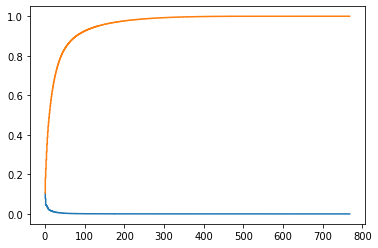

In [ ]:
b = pcaifier(embeddings, 100)